<a href="https://colab.research.google.com/github/eddielopgithub/Math4Data/blob/main/Estad%C3%ADstica_con_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Varianza y desviación Estándar con Pandas

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
#Contexto
# (0) Edad
# (1) Gastos mensuales en medicina
# (2) Gastos mensuales en educación
# (3) Gastos mensuales en cacahuates

datos = {'edad' : [35, 50, 22, 45, 18, 75, 55, 20, 23, 49],
         'medicina' : [200, 1500, 150, 250, 0, 2500, 1400, 50, 0, 600],
         'educacion' : [1200, 0, 7500, 2200, 8300, 0, 0, 4900, 5100, 800],
         'cacahuates' : [10, 15, 0, 10, 20, 10, 20, 10, 15, 0]}

datos = pd.DataFrame(datos)
datos

,edad,medicina,educacion,cacahuates
0,35,200,1200,10
1,50,1500,0,15
2,22,150,7500,0
3,45,250,2200,10
4,18,0,8300,20
5,75,2500,0,10
6,55,1400,0,20
7,20,50,4900,10
8,23,0,5100,15
9,49,600,800,0


In [ ]:
datos.aggregate(['std', 'var'])

,edad,medicina,educacion,cacahuates
std,18.77,851.49,"3,198.61",6.99
var,352.40,"725,027.78","10,231,111.11",48.89


#Matriz de Covarianza en pandas

In [ ]:
print(datos.var()) #Calculamos la varianza

edad                352.40
medicina        725,027.78
educacion    10,231,111.11
cacahuates           48.89
dtype: float64


In [ ]:
#Matriz de covarianza
datos.cov()

,edad,medicina,educacion,cacahuates
edad,352.40,"14,530.00","-51,788.89",-0.78
medicina,"14,530.00","725,027.78","-1,923,333.33",816.67
educacion,"-51,788.89","-1,923,333.33","10,231,111.11",-500.00
cacahuates,-0.78,816.67,-500.00,48.89


In [ ]:
#Matriz de correlación
datos.corr()

,edad,medicina,educacion,cacahuates
edad,1.00,0.91,-0.86,-0.01
medicina,0.91,1.00,-0.71,0.14
educacion,-0.86,-0.71,1.00,-0.02
cacahuates,-0.01,0.14,-0.02,1.00


#Medidas de dispersión (con numpy)

In [ ]:
#contexto : Levantamiento de pesas
pesos = [5, 15, 25, 35, 40, 55, 80, 90, 170]

In [ ]:
#Rango
f'Rango: {np.max(pesos) - np.min(pesos)}'

'Rango: 165'

In [ ]:
#Varianza
#Varianza poblacional
print(f'Varianza poblacional: {np.var(pesos)}')
#Varianza muestral
print(f'Varianza muestral: {np.var(pesos, ddof=1)}')

Varianza poblacional: 2295.0617283950614
Varianza muestral: 2581.9444444444443


In [ ]:
#Desviación estándar
#Desv. std poblacional
print(f'Desviación estándar poblacional: {np.std(pesos)}')
#Desv. std muestral
print(f'Desviación estándar muestral: {np.std(pesos, ddof=1)}')

Desviación estándar poblacional: 47.90680252735577
Desviación estándar muestral: 50.812837398087154


In [ ]:
#Rango Intercuartil
Q1 = np. percentile(pesos, 25)
Q3 = np. percentile(pesos, 75)
f'Rango intercuartílico: {Q3 - Q1}'

'Rango intercuartílico: 55.0'

#Cuantiles de una distribución de datos

In [ ]:
alturas = np.random.normal(1.75, 0.15, 100000)
alturas

array([1.60188834, 1.72830244, 1.66855461, ..., 1.7440152 , 1.73793843,
       1.45964671])

In [ ]:
np.quantile(alturas, [0, 1/4, 2/4, 3/4, 1])

array([1.07489867, 1.64851756, 1.74892306, 1.85033162, 2.4249962 ])

#Correlación de Spearman

In [ ]:
#Importamos la función
from scipy.stats import spearmanr

#Creamos los arreglos para el ejercicio
goles = [2, 15, 3, 8, 0, 11]
ASISTENCIAS = [4, 7, 8, 6, 1, 13]

#Invocamos a la función de Spearman y obtenemos el resultado
corr,_ = spearmanr(goles, ASISTENCIAS)
f'Spearman correlation coefficient: {corr:.3f}'

'Spearman correlation coefficient: 0.714'

In [ ]:
#Otra forma de calcular Spearman con scipy
#Importamos la función
from scipy import stats
#Invocamos la función y obtenemos el resultados
stats.spearmanr(goles, ASISTENCIAS)[0]

0.7142857142857143

#Datos categóricos ordinales

##Codificador Ordinal

In [ ]:
categorias_servicio = ['Muy insatisfecho', 'Insatisfecho', 'Neutral', 'Satisfecho', 'Muy satisfecho']

categorias_calidad = ['Mala', 'Buena', 'Muy buena', 'Excelente']

encuesta = { 'servicio' : ['Muy insatisfecho', 'Insatisfecho',
                           'Neutral', 'Satisfecho', 'Muy satisfecho',
                           'Muy insatisfecho'],
            'alimentos' : ['Mala', 'Buena', 'Muy buena',
                           'Excelente', 'Mala', 'Buena']
}

# 0: cliente esporádico     1: cliente frecuente
tipo_cliente = [0, 0, 1, 1, 0, 1]

In [ ]:
pd.DataFrame(encuesta)

,servicio,alimentos
0,Muy insatisfecho,Mala
1,Insatisfecho,Buena
2,Neutral,Muy buena
3,Satisfecho,Excelente
4,Muy satisfecho,Mala
5,Muy insatisfecho,Buena


In [ ]:
# Importamos el codificador 'OrdinalEncoder' de scikit-learn
from sklearn.preprocessing import OrdinalEncoder
# Creamos el df de datos de ejemplo
datos_ord = pd.DataFrame(encuesta)
# Instanciamos el codificador
codificador = OrdinalEncoder(categories=[categorias_servicio, categorias_calidad]) 
# Ajustamos y transformamos los datos utilizando el método fit_transform
datos_ord = pd.DataFrame(codificador.fit_transform(datos_ord),
                         columns=['servicio', 'alimentos'])
# Visualizamos el df
datos_ord

,servicio,alimentos
0,0.00,0.00
1,1.00,1.00
2,2.00,2.00
3,3.00,3.00
4,4.00,0.00
5,0.00,1.00


##Codificador OneHotEnocoder

In [ ]:
# Importamos el codificador 'OneHotEncoder' de scikit-learn
from sklearn.preprocessing import OneHotEncoder
# Creamos el df para el ejemplo
datos_one = pd.DataFrame(encuesta)
# Instaciamos el codificador
codificador = OneHotEncoder()
# Ajustamos el codificador y los datos para transformarlos
datos_one = pd.DataFrame(codificador.fit_transform(datos_one).toarray(),
                         columns=np.concatenate(codificador.categories_))
# Mostrar los datos codificados
print(datos_one)


   Insatisfecho  Muy insatisfecho  Muy satisfecho  Neutral  Satisfecho  Buena  \
0          0.00              1.00            0.00     0.00        0.00   0.00   
1          1.00              0.00            0.00     0.00        0.00   1.00   
2          0.00              0.00            0.00     1.00        0.00   0.00   
3          0.00              0.00            0.00     0.00        1.00   0.00   
4          0.00              0.00            1.00     0.00        0.00   0.00   
5          0.00              1.00            0.00     0.00        0.00   1.00   

   Excelente  Mala  Muy buena  
0       0.00  1.00       0.00  
1       0.00  0.00       0.00  
2       0.00  0.00       1.00  
3       1.00  0.00       0.00  
4       0.00  1.00       0.00  
5       0.00  0.00       0.00  


In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Datos de ejemplo
data = np.array([["rojo", "pequeño", "coche"],
                 ["verde", "mediano", "moto"],
                 ["azul", "grande", "coche"],
                 ["verde", "pequeño", "moto"]])

# Crear un objeto OneHotEncoder
encoder = OneHotEncoder()

# Ajustar el codificador a los datos y transformarlos
encoded_data = encoder.fit_transform(data)

# Mostrar los datos codificados
print(encoded_data.toarray())

[[0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1.]]


#Regresión Logística

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Listas de datos
frecuencias_cardiacas = [[65], [70], [80], [80], [80],
                         [90], [95], [100], [105], [110],
                         [105], [110], [110], [120], [120],
                         [130], [140], [180], [185], [190]]

clase = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Creamos los conjuntos de entrenamineto y de prueba del modelo
train_data, test_data, train_target, test_target = train_test_split(frecuencias_cardiacas,
                                                                    clase,
                                                                    test_size=0.3,
                                                                    random_state=0)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(train_data, train_target)

# Use the trained model to make predictions on the test data
predictions = model.predict_proba(test_data)
np.set_printoptions(suppress=True) #Suprimir notación científica

# Print predictions score
print(model.score(test_data, test_target))

0.8333333333333334


# Codificar datos categóricos nominales

In [ ]:
# Datos
datos = {'nombre' : ['Mariana', 'Ana', 'Elsa', 'Gustavo',
                     'Pedro', 'Raúl', 'Carlos', 'José', 'Luis'],
         'saldo' : [10000.00, 8000.00, 9000.00, 2000.00,
                    2100.00, 12000.00, 5000.00, 10000.00, 200.00],
         'pais' : ['Argentina', 'Bolivia', 'Chile', 'Colombia',
                   'Costa Rica', 'Ecuador', 'México', 'Perú', 'Perú']
}

# Trasnformamos nuestro dicc de datos en un df
datos = pd. DataFrame(datos)
# Visualizamos el df
datos

,nombre,saldo,pais
0,Mariana,"10,000.00",Argentina
1,Ana,"8,000.00",Bolivia
2,Elsa,"9,000.00",Chile
3,Gustavo,"2,000.00",Colombia
4,Pedro,"2,100.00",Costa Rica
5,Raúl,"12,000.00",Ecuador
6,Carlos,"5,000.00",México
7,José,"10,000.00",Perú
8,Luis,200.00,Perú


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nombre  9 non-null      object 
 1   saldo   9 non-null      float64
 2   pais    9 non-null      object 
dtypes: float64(1), object(2)
memory usage: 344.0+ bytes


In [ ]:
# Codificamos los datos con onehot
# Importamos el codificador 'OneHotEncoder' de scikit-learn
from sklearn.preprocessing import OneHotEncoder
# Instanciamos el codificador
codificador = OneHotEncoder()
# Hacemos la transformación de datos con en método 'fit_transform'
codificacion = codificador.fit_transform(datos[['pais']])
# Creamos el df de la codificación
codificacion_df = pd.DataFrame(codificacion.toarray(),
                               columns=codificador.categories_)
#Concatenamos el df de datos con la nueva codificación
data = pd.concat([datos, codificacion_df], axis='columns')
# Eliminamos la columna de categoría 'país' para evitar sesgos
data.drop('pais', axis='columns', inplace=True)
#Visualizamos el nuevo df de data
data

,nombre,saldo,"(Argentina,)","(Bolivia,)","(Chile,)","(Colombia,)","(Costa Rica,)","(Ecuador,)","(México,)","(Perú,)"
0,Mariana,"10,000.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Ana,"8,000.00",0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Elsa,"9,000.00",0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
3,Gustavo,"2,000.00",0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
4,Pedro,"2,100.00",0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
5,Raúl,"12,000.00",0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
6,Carlos,"5,000.00",0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
7,José,"10,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
8,Luis,200.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


#Regresión Lineal Simple

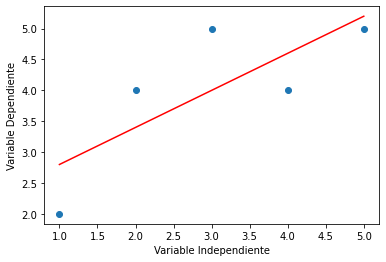

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrenamiento
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Calcular los valores de la pendiente (beta1) y el intercepto (beta0)
beta1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
beta0 = np.mean(y) - beta1 * np.mean(x)

# Hacer las predicciones
y_pred = beta0 + beta1 * x

# Mostrar los resultados
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.show()

#Correlación de Pearson y cómo crear Mapas de Calor de la Matriz de Correlaciones

In [ ]:
# Obtención de datos
# Enalazamos con nuestra fuente de datos instanciando el objeto 'personas_'.
personas_ = 'https://raw.githubusercontent.com/CodigoMaquina/code/main/datos/personas.csv'
# Creamos el dataframe de trabajo
personas = pd.read_csv(personas_)
personas.head()

,altura,peso,ingreso,horas_trabajadas,ausencias
0,134.43,70.62,"9,973.58",40.91,4
1,167.16,109.27,"8,961.05",41.58,4
2,141.48,81.03,"7,437.98",41.37,5
3,123.23,57.88,"12,064.92",41.54,3
4,143.55,93.58,"9,296.40",40.44,4


#Datos anómalos y outliers

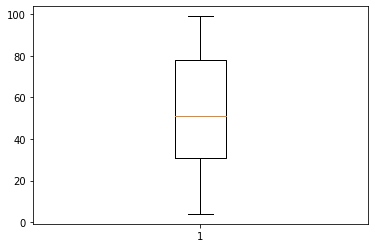

In [ ]:
# Variable
edades = np.array([4, 17, 29, 33, 50, 51, 61, 71, 85, 92, 99])
# GRáfico caja y bigotes
plt.boxplot(edades)
plt.show()